In [5]:
import matplotlib.pyplot as plt 
import numpy as np 
from HkVp_multilayer.hkvp_stacking import HkVp_stacking



maindir = "seismic_data_RFAC"
stationname = "TASTE_T36"

datadir = f"{maindir}/{stationname}"
delta = 0.01  # Time step in seconds
sed_depth_min = 5
sed_depth_max = 8
sed_k_min = 1.8
sed_k_max = 3
priorparam = {
    "Nlayer":2,
    "Vps":[3., 6.36],
    "Hs":[100, sed_depth_min, sed_depth_max, 32, 40],
    "Ks":[100, sed_k_min, sed_k_max, 1.6, 1.9]
}


phaseparam = [
    {
        "Pbs":      [1, 0, 1,  -1], 
        "PpPbs":    [1, 0, 1,   1], 
        "PpSbs":    [-1, 0, 2,  0], 
        "PsSbs":    [-1, 0, 3, -1],
        "PbP":      [-1, 2, 0,  2], 
        "SbS":      [-1, 4, 2,  0]  
    },
    {
        "Pms":      [1, 1,  1, -1,  1, -1,],  
        # "PpPms-PbP":[1, 1,  1, -1,  1,  1,],  
        "PpPms":    [1, 1,  1,  1,  1,  1,],  
        "PmP":      [-1,3,  0,  2,  0,  2,],  
        # "PmP+PbP":  [1, 3,  0,  4,  0,  2,],  
        "bPmSb":    [1, 5,  0,  0,  1,  1,],  
#        "PpPms":    [1, 5,  1,  1,  1,  1,],  
    }
]

datanpz = np.load(f"{datadir}/data_stack52.npz") ##7 5, 0.08
data_stack = datanpz['data_stack']
ray_params = datanpz['ray_params']
traces_suppress = [1,1,3,3,5,5]  ## the trace number where the phases trace should be suppressed; The traces should have the same data source with their index trace
alphas = [5,2,5,2,5,2]    ## 
HkVp_instance = HkVp_stacking(delta,
                            data_stack,
                            alphas,
                            traces_suppress,
                            ray_params,
                            priorparam,
                            phaseparam,
                            2
                            )
HkVp_instance.do_Hk_stacking()
# amp_vpc=HkVp_instance.do_Vpc_searching(6.,7.,10)
HkVp_instance.do_hk_bootstrap(1000,16)
HkVp_instance.save_result_to_npz(savedir=datadir,savename='Hk_result_52_pws2')
del HkVp_instance


Process 135337 working (Job Number : 62)
Process 135338 working (Job Number : 62)
Process 135339 working (Job Number : 62)
Process 135340 working (Job Number : 62)
Process 135341 working (Job Number : 62)
Process 135342 working (Job Number : 62)
Process 135343 working (Job Number : 62)
Process 135344 working (Job Number : 62)
Process 135345 working (Job Number : 62)
Process 135346 working (Job Number : 62)
Process 135347 working (Job Number : 62)
Process 135348 working (Job Number : 62)
Process 135349 working (Job Number : 62)
Process 135350 working (Job Number : 62)
Process 135351 working (Job Number : 62)
Process 135352 working (Job Number : 62)
Process 135337 finished
Process 135342 finished
Process 135339 finished
Process 135341 finished
Process 135340 finished
Process 135343 finished
Process 135344 finished
Process 135338 finished
Process 135348 finished
Process 135347 finished
Process 135346 finished
Process 135352 finished
Process 135350 finished
Process 135349 finished
Process 

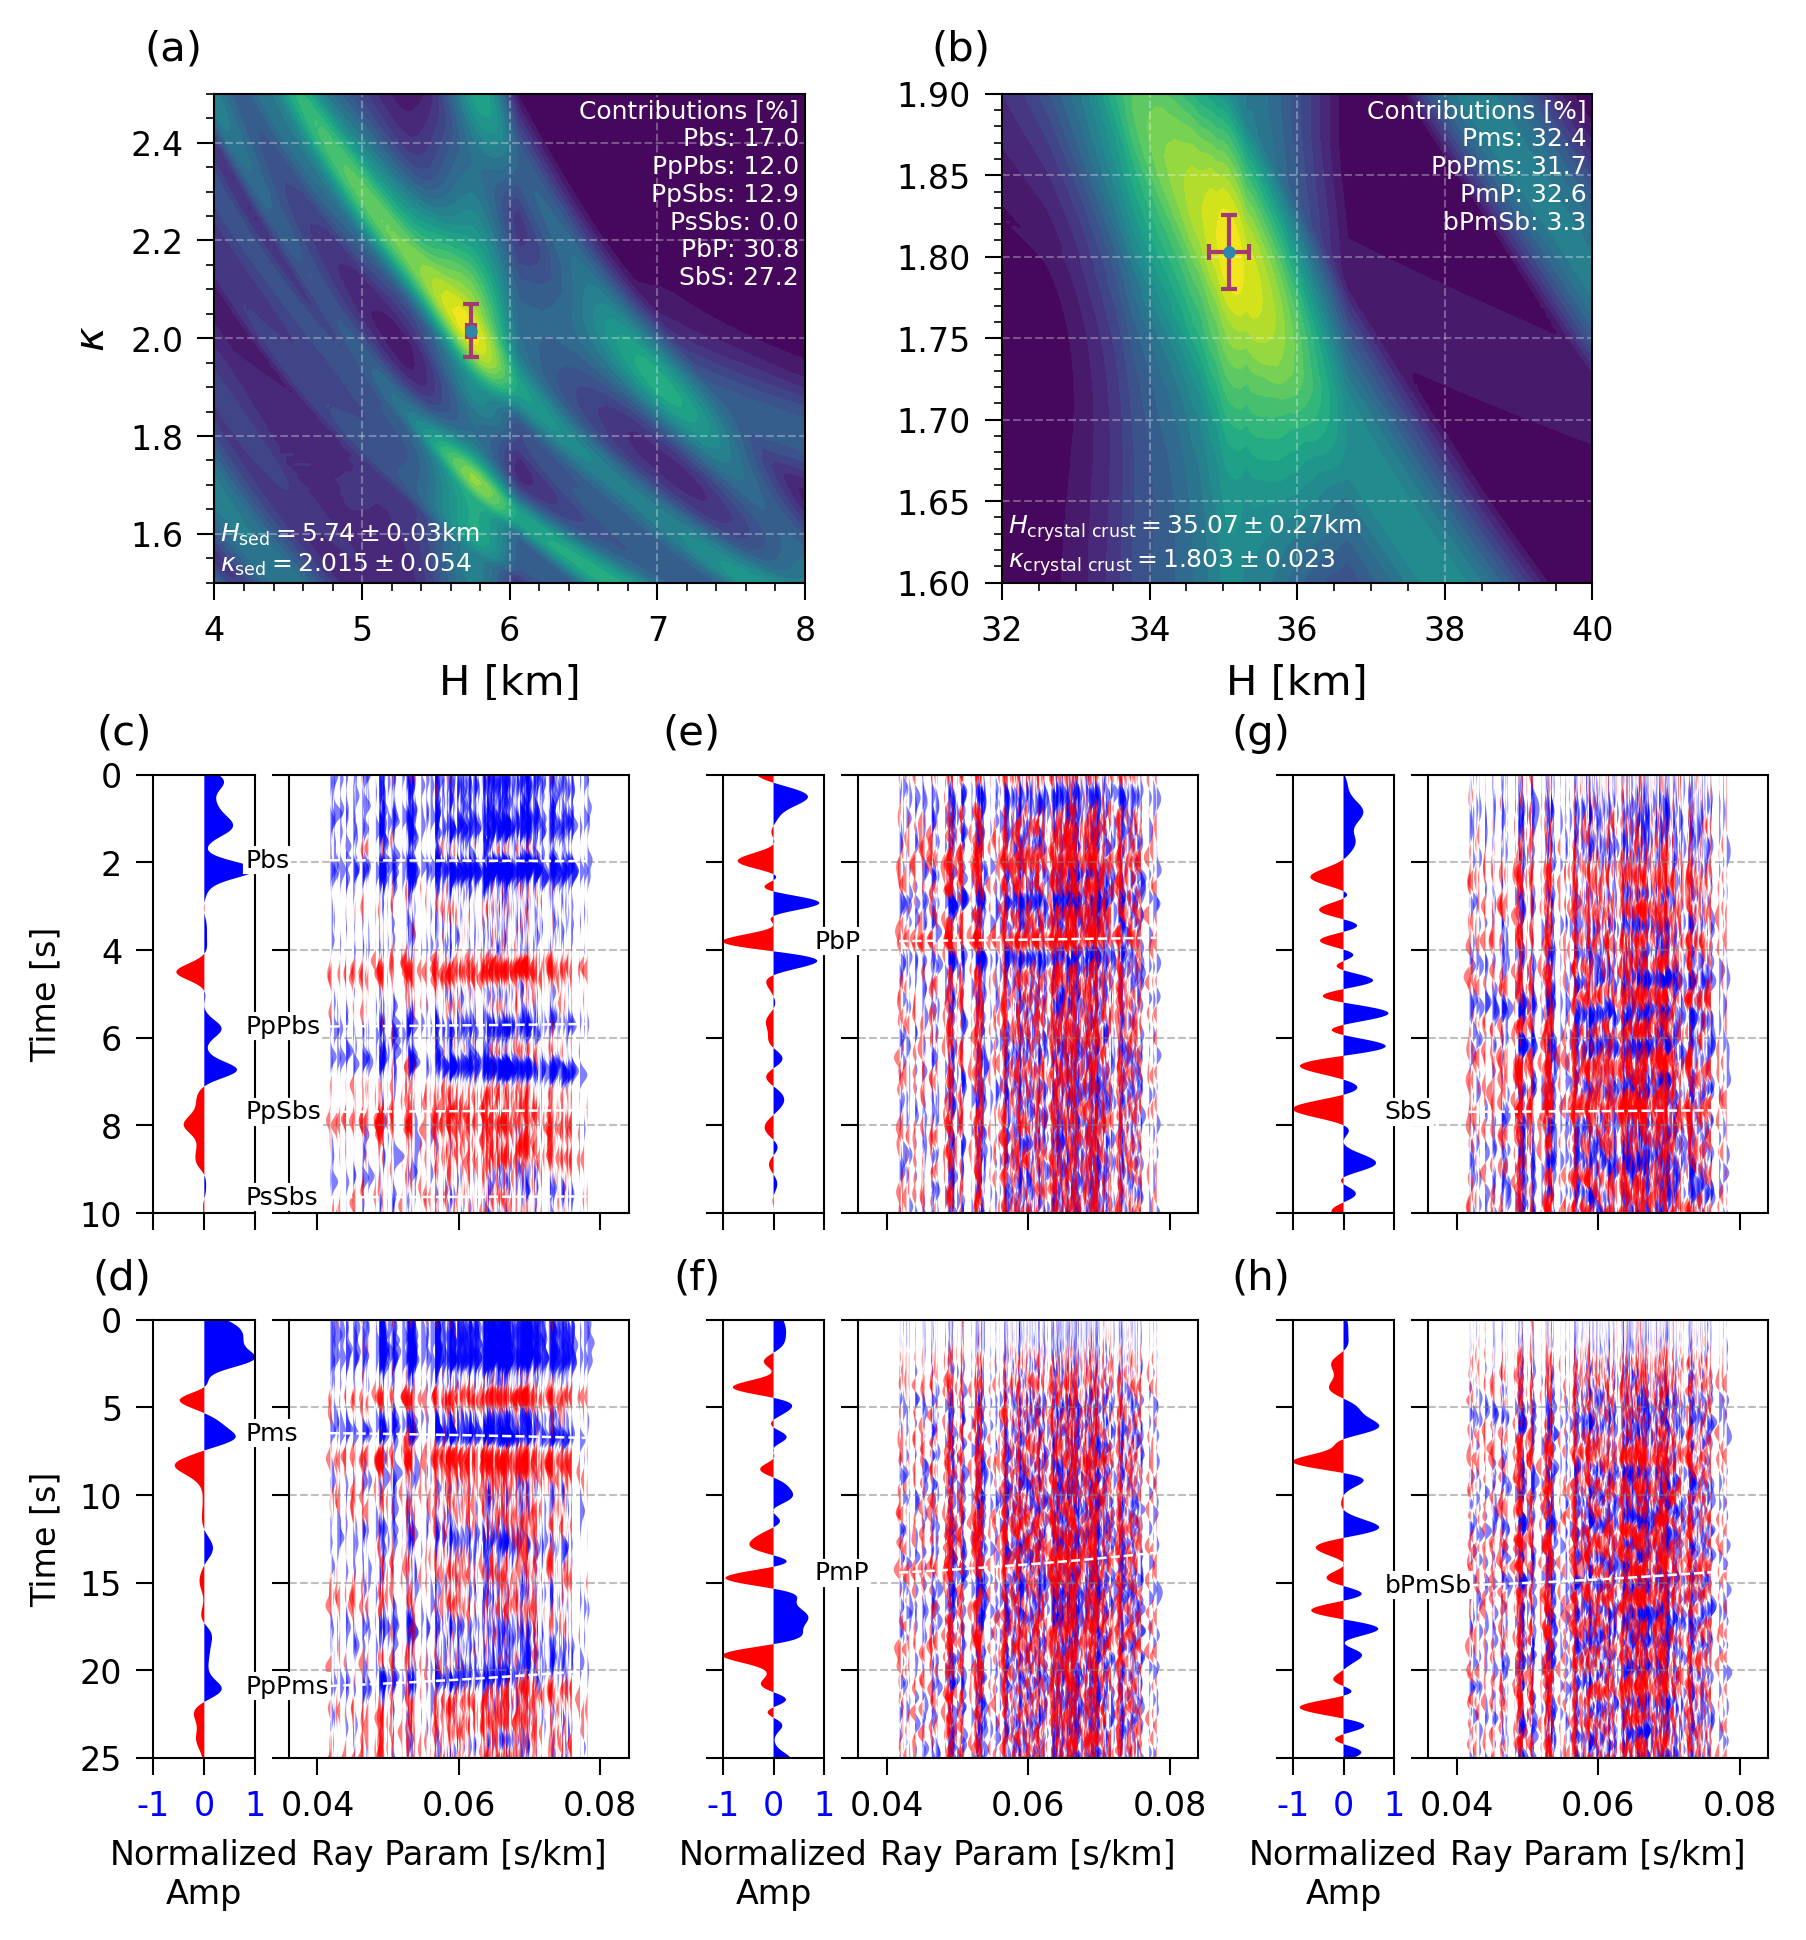

In [1]:
from HkVp_multilayer.plotting import Plot_HkVp
import matplotlib.pyplot as plt 
import numpy as np 
plt.rcParams['figure.dpi'] = 300


maindir = "seismic_data_RFAC"
stationname = "TASTE_T33"
datadir = f"{maindir}/{stationname}"
save_filename = f"Hk_result_52_pws2_Hk_result.npz"
plot_instance = Plot_HkVp(savefile=f"{datadir}/{save_filename}")
plot_instance.data_Hk_Phasefitting(savefile=f"{datadir}/Hk_phasefitting.pdf",dpi=900,plotlengths = [10,25,10,25,10,25])
#plot_instance.plot_HkVp(savefile=f"{resultdir}/HkVp.pdf",dpi=900)